<a href="https://colab.research.google.com/github/RizkiNoor16/ind-sentiment-analysyt-nlp/blob/main/Preprocessing_%26_Exploration_data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Chek GPU
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [2]:
!git clone https://github.com/Ricco48/Emotion-Dataset-from-Indonesian-Public-Opinion.git
!ls Emotion-Dataset-from-Indonesian-Public-Opinion

fatal: destination path 'Emotion-Dataset-from-Indonesian-Public-Opinion' already exists and is not an empty directory.
'Emotion Dataset from Indonesian Public Opinion'   LICENSE   README.md


In [3]:
data_dir ='/content/Emotion-Dataset-from-Indonesian-Public-Opinion/Emotion Dataset from Indonesian Public Opinion/'

In [4]:
import os
filenames = [data_dir + filenames for filenames in os.listdir(data_dir)]
filenames

['/content/Emotion-Dataset-from-Indonesian-Public-Opinion/Emotion Dataset from Indonesian Public Opinion/LoveData.csv',
 '/content/Emotion-Dataset-from-Indonesian-Public-Opinion/Emotion Dataset from Indonesian Public Opinion/FearData.csv',
 '/content/Emotion-Dataset-from-Indonesian-Public-Opinion/Emotion Dataset from Indonesian Public Opinion/AngerData.csv',
 '/content/Emotion-Dataset-from-Indonesian-Public-Opinion/Emotion Dataset from Indonesian Public Opinion/SadData.csv',
 '/content/Emotion-Dataset-from-Indonesian-Public-Opinion/Emotion Dataset from Indonesian Public Opinion/NeutralData.csv',
 '/content/Emotion-Dataset-from-Indonesian-Public-Opinion/Emotion Dataset from Indonesian Public Opinion/JoyData.csv']

In [5]:
def get_lines(filename):
  with open(filename, "r") as f:
    return f.readlines()

In [6]:
love_line = get_lines(data_dir + 'AngerData.csv')
love_line[:5]

['Tweet\tLabel\n',
 'pagi2 udah di buat emosi :)\tAnger\n',
 'kok stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi ke partai tertentu..narasi klhtn intelektual tp bodoh..\tAnger\n',
 'dah lah emosi mulu liat emyu\tAnger\n',
 'aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah. semisal anak perempuanmu ditempeleng! apa kau juga setuju untuk dia bersikap bungkam? melapor polisi adl benar. lantas apa bedanya\tAnger\n']

In [7]:
anger_path = '/content/Emotion-Dataset-from-Indonesian-Public-Opinion/Emotion Dataset from Indonesian Public Opinion/AngerData.csv'
fear_path = '/content/Emotion-Dataset-from-Indonesian-Public-Opinion/Emotion Dataset from Indonesian Public Opinion/FearData.csv'
joy_path = '/content/Emotion-Dataset-from-Indonesian-Public-Opinion/Emotion Dataset from Indonesian Public Opinion/JoyData.csv'
love_path = '/content/Emotion-Dataset-from-Indonesian-Public-Opinion/Emotion Dataset from Indonesian Public Opinion/LoveData.csv'
neutral_path = '/content/Emotion-Dataset-from-Indonesian-Public-Opinion/Emotion Dataset from Indonesian Public Opinion/NeutralData.csv'
sad_path = '/content/Emotion-Dataset-from-Indonesian-Public-Opinion/Emotion Dataset from Indonesian Public Opinion/SadData.csv'

In [8]:
import pandas as pd
fear_df=pd.read_csv(fear_path, sep='\t' )
anger_df = pd.read_csv(anger_path, sep ='\t')
joy_df = pd.read_csv(joy_path, sep='\t')
love_df = pd.read_csv(love_path, sep='\t')
neutral_df = pd.read_csv(neutral_path, sep='\t')
sad_df = pd.read_csv(sad_path, sep= '\t')

sample_df = pd.concat([fear_df, anger_df, joy_df, love_df, neutral_df, sad_df])
sample_df[:10]

,Tweet,Label
0,trs barusan dia reach out aku trs minta tolong...,Fear
1,sumpah ini receh bgt dan not bts related. cm j...,Fear
2,ragu utk bisa beli barang tu karn harganya bis...,Fear
3,bisa gak sih langsung tanggal 11 aja gausah ad...,Fear
4,iya kaan yg lain suka pada coba pd gpp tp tete...,Fear
5,eh sumpah gw takut bangett. serem bangett itu ...,Fear
6,"namnjim lag like like nya ngeri bgt, anak buah...",Fear
7,ogeb bat dah pake sok sok an kaget,Fear
8,"plis nilai akm keluarnya lama banget, takut",Fear
9,"mau ikut esd aja telat, trus takut flop",Fear


In [9]:
sample_df.Label.value_counts()

Neutral    2001
Joy        1275
Anger      1130
Sad        1003
Fear        911
Love        760
Name: Label, dtype: int64

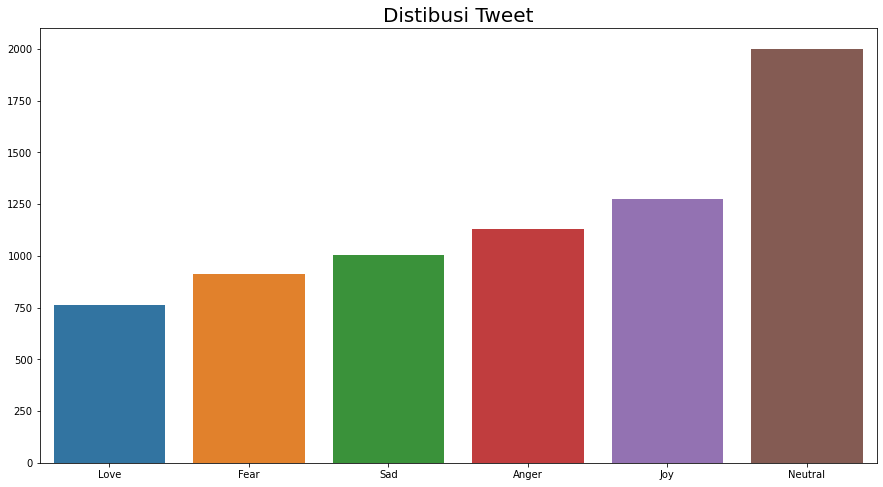

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
plt.title('Distibusi Tweet', fontsize=20)

distribusi_tweet = sample_df['Label'].value_counts().sort_values()
sns.barplot(x=list(distribusi_tweet.keys()),
            y=distribusi_tweet.values)


In [11]:
sample_df['Panjang_tweet']= [len(tweet) for tweet in sample_df.Tweet]

sample_df['Jumlah_kalimat'] = [len(tweet.split()) for tweet in sample_df.Tweet]

sample_df.head()

,Tweet,Label,Panjang_tweet,Jumlah_kalimat
0,trs barusan dia reach out aku trs minta tolong...,Fear,122,22
1,sumpah ini receh bgt dan not bts related. cm j...,Fear,272,48
2,ragu utk bisa beli barang tu karn harganya bis...,Fear,68,12
3,bisa gak sih langsung tanggal 11 aja gausah ad...,Fear,92,18
4,iya kaan yg lain suka pada coba pd gpp tp tete...,Fear,58,13


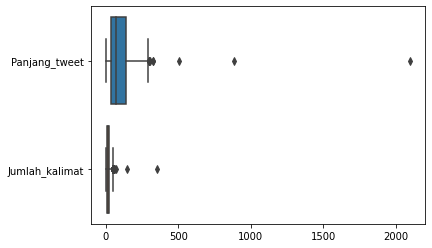

In [12]:
sns.boxplot(data=sample_df[["Panjang_tweet", "Jumlah_kalimat"]],orient='h')

In [13]:
print('Panjang Tweet Deskripsi')
print('==================================')
print(sample_df['Panjang_tweet'].describe())
print('==================================')

Panjang Tweet Deskripsi
count    7080.000000
mean       99.505085
std        81.671417
min         4.000000
25%        38.000000
50%        74.000000
75%       141.000000
max      2097.000000
Name: Panjang_tweet, dtype: float64


In [14]:
print('Jumlah kalimat Deskripsi')
print('==================================')
print(sample_df['Jumlah_kalimat'].describe())
print('==================================')

Jumlah kalimat Deskripsi
count    7080.000000
mean       16.760734
std        13.588522
min         1.000000
25%         7.000000
50%        13.000000
75%        24.000000
max       356.000000
Name: Jumlah_kalimat, dtype: float64


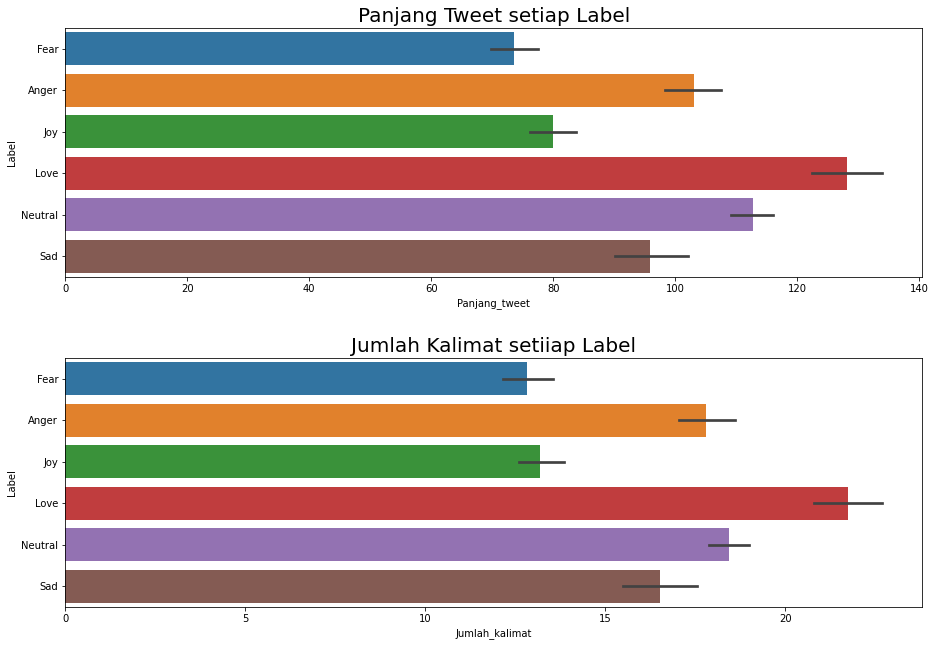

In [20]:
fig, (ax1,ax2) = plt.subplots(2, figsize=(14,10))

#set spacing tiap plot
fig.tight_layout(pad=6)

#Plot panjang twit tiap Label
ax1.set_title('Panjang Tweet setiap Label', fontsize=20)
sns.barplot(data=sample_df,x='Panjang_tweet', y='Label',
            orient='h',
            ax=ax1)

#Plot Jumlah kalimat tiap label
ax2.set_title('Jumlah Kalimat setiiap Label',fontsize=20)
sns.barplot(data=sample_df, x='Jumlah_kalimat', y='Label',
            orient='h',
            ax=ax2)

In [35]:
#Familiar dengan dataset
import random
random_index = random.randint(0,len(sample_df)-5)
for row in sample_df[['Tweet', 'Label']][random_index:random_index+5].itertuples():
  _,tweet, label = row
  print(f'Sentiment {label}')
  print(f'Tweet : \n {tweet} \n')
  print(f'---\n')

Sentiment Neutral
Tweet : 
 tidur normal, gk begadang liat mu membuat hidup lebih bahagia 

---

Sentiment Neutral
Tweet : 
 orang priveleged je rasa air evian tu biasa-biasa. tak semahal yang lain. 

---

Sentiment Neutral
Tweet : 
 menghayal menunggu tiba masanya dimana penyakit covid setara dengan masuk angin biasa dan diobati cukup dengan minum antagin atau kerokan. sambil menunggu masa itu tiba tetap jaga kesehatan dan jaga diri ya. masker vaksin serta taat prokes masih jadi solusi terbaik. 

---

Sentiment Neutral
Tweet : 
 mrk ga akan pernah telusuri dg tuntas makna kisah dan ayat alquran yg disampaikan. spt biasa ambil sepotong ayat lalu sebarkan demi menjelek2an ajaran islam. 

---

Sentiment Neutral
Tweet : 
 boleh dong. aku jg biasa sore 

---



In [37]:
#save dataframe to csv
sample_df.to_csv('Dataset.csv')